In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [28]:

from pandas_datareader.data import DataReader

In [12]:
#importing Data from the online platfrom
from pandas_datareader import data

In [14]:
from datetime import datetime

In [15]:
from __future__ import division

In [153]:
#Passing the Ticker for the Stocks
tech_list = ['AAPL','GOOG','MSFT','AMZN','TSLA']

In [20]:
#Setting up data and time for the current data
#Data which is one year ago from the current date
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [30]:
#For grabing the information from the Yahoo Finance 
#We are using this code
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [33]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-15,150.000000,147.089996,149.240005,148.479996,106820300.0,147.636520
2021-07-16,149.759995,145.880005,148.460007,146.389999,93251400.0,145.558380
2021-07-19,144.070007,141.669998,143.750000,142.449997,121434600.0,141.640778
2021-07-20,147.100006,142.960007,143.460007,146.149994,96350000.0,145.319748
2021-07-21,146.130005,144.630005,145.529999,145.399994,74993500.0,144.574005


- Open represents the Opening Price of the stock
- Close represrnts the closing Price of teh stock
- Volume represents volume traded that stock
- Here 'Adj Close' represents ajusted closing price


In [34]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,157.992024,154.254960,156.030079,156.198572,8.896427e+07,155.814897
std,12.799624,12.477763,12.713206,12.634207,2.662860e+07,12.628040
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,147.827496,145.147495,146.022503,146.357502,7.038242e+07,145.916855
50%,154.675003,150.510002,152.235001,152.284996,8.483335e+07,151.900696
75%,169.727493,165.512501,167.607498,166.727497,1.031110e+08,166.482895
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [35]:

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-07-15 to 2022-07-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

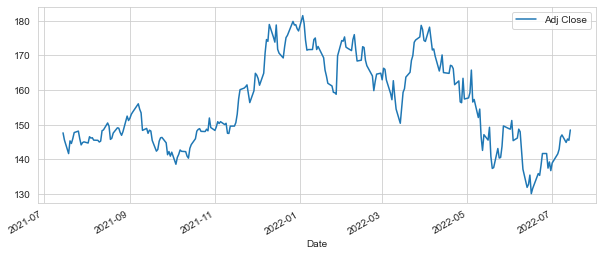

In [36]:
#Here 'Adj Close' represents ajusted closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

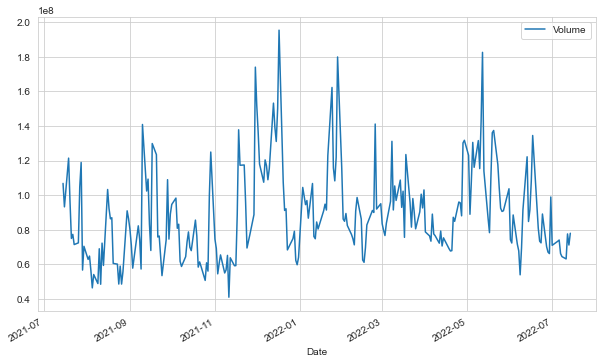

In [40]:
AAPL['Volume'].plot(legend=True,figsize=(10,6))

In [56]:
#Calculating 10 day,20 day, 50 day moving average
ma_day = [10,20,50]

#We are making a new column by column_name which is string
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

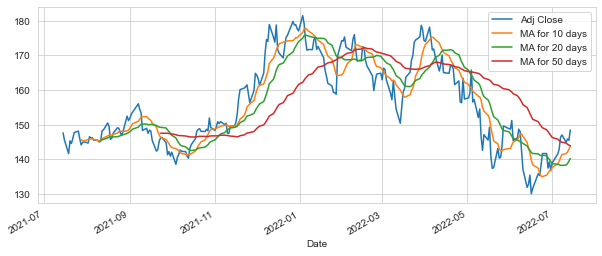

In [156]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

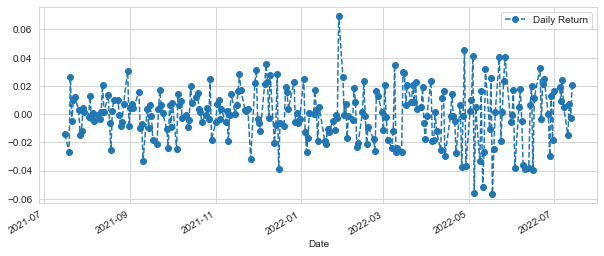

In [65]:
#Creating a new column Daily Retun and applying percentage change function on it

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (10,4),legend = True,linestyle='--',marker='o')

In [62]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-07-15,150.000000,147.089996,149.240005,148.479996,106820300.0,147.636520,NaN,NaN,NaN,NaN
2021-07-16,149.759995,145.880005,148.460007,146.389999,93251400.0,145.558380,NaN,NaN,NaN,-0.014076
2021-07-19,144.070007,141.669998,143.750000,142.449997,121434600.0,141.640778,NaN,NaN,NaN,-0.026914
2021-07-20,147.100006,142.960007,143.460007,146.149994,96350000.0,145.319748,NaN,NaN,NaN,0.025974
2021-07-21,146.130005,144.630005,145.529999,145.399994,74993500.0,144.574005,NaN,NaN,NaN,-0.005132


In [63]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-07-15 to 2022-07-14
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   High            252 non-null    float64
 1   Low             252 non-null    float64
 2   Open            252 non-null    float64
 3   Close           252 non-null    float64
 4   Volume          252 non-null    float64
 5   Adj Close       252 non-null    float64
 6   MA for 10 days  243 non-null    float64
 7   MA for 20 days  233 non-null    float64
 8   MA for 50 days  203 non-null    float64
 9   Daily Return    251 non-null    float64
dtypes: float64(10)
memory usage: 21.7 KB


D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

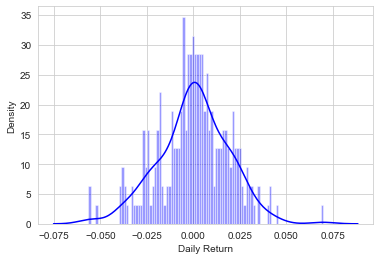

In [68]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

In [71]:
#To analyse all the returns of all the stock in our list
#Creating a Data Frame with Closing date
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [73]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-15,147.636505,2625.330078,278.753815,181.559998
2021-07-16,145.558395,2636.909912,278.476105,178.681503
2021-07-19,141.640778,2585.080078,274.766418,177.479507
2021-07-20,145.319748,2622.030029,277.057678,178.659500
2021-07-21,144.574020,2652.010010,279.120819,179.259995


In [74]:
#Getting the daily returns for our stocks
tech_rets = closing_df.pct_change()

In [75]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-15,NaN,NaN,NaN,NaN
2021-07-16,-0.014076,0.004411,-0.000996,-0.015854
2021-07-19,-0.026914,-0.019656,-0.013321,-0.006727
2021-07-20,0.025974,0.014294,0.008339,0.006649
2021-07-21,-0.005132,0.011434,0.007447,0.003361


D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


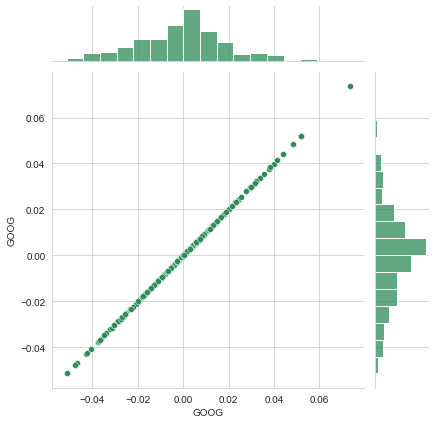

In [78]:

#comparing Google to itself
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


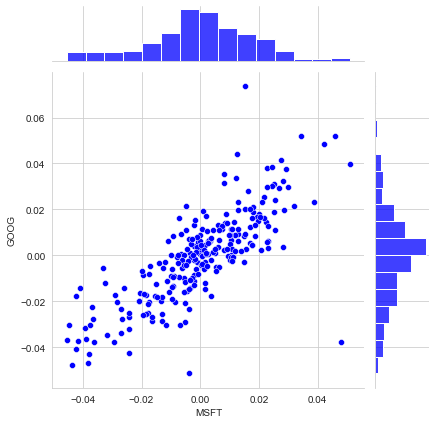

In [80]:
sns.jointplot('MSFT','GOOG',tech_rets,kind = 'scatter',color='blue')

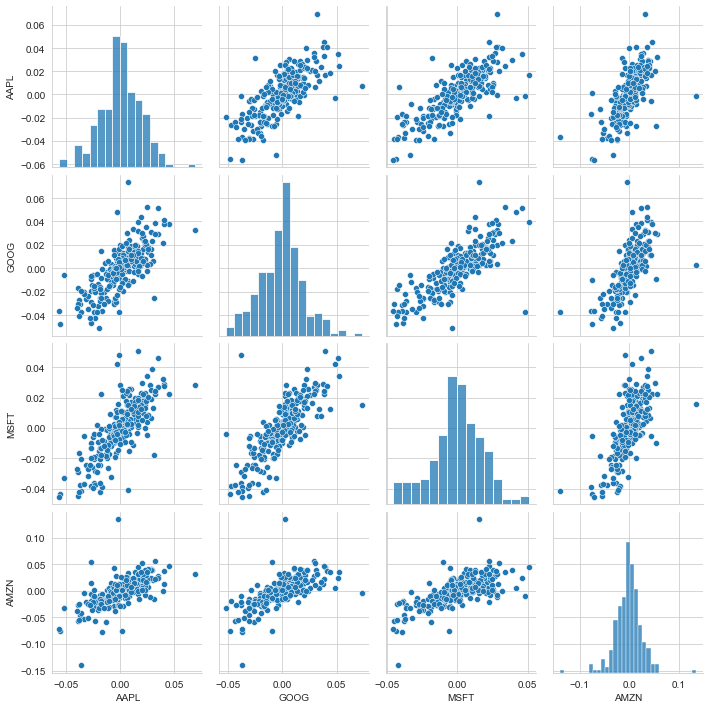

In [82]:
sns.pairplot(tech_rets.dropna())
#We have Histogram for every stock for daily return

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserW

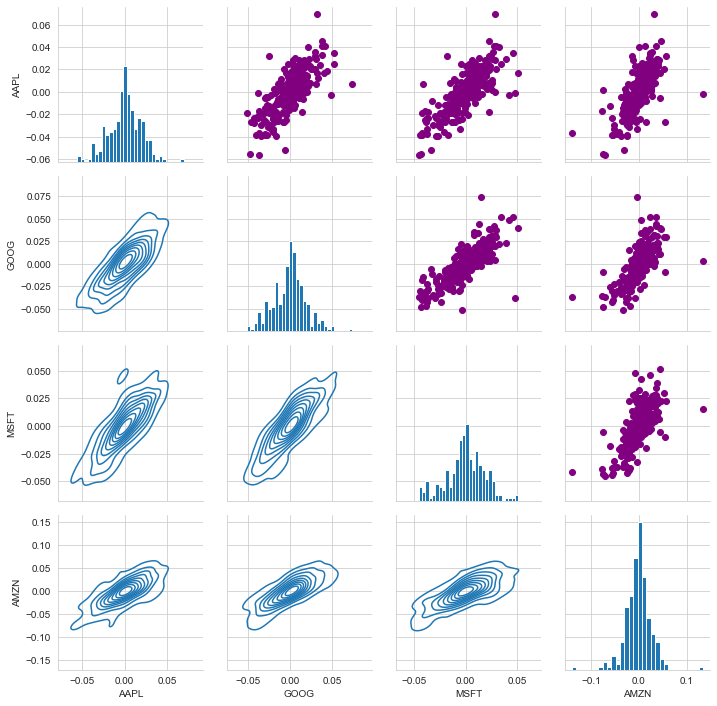

In [86]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,c_map='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserW

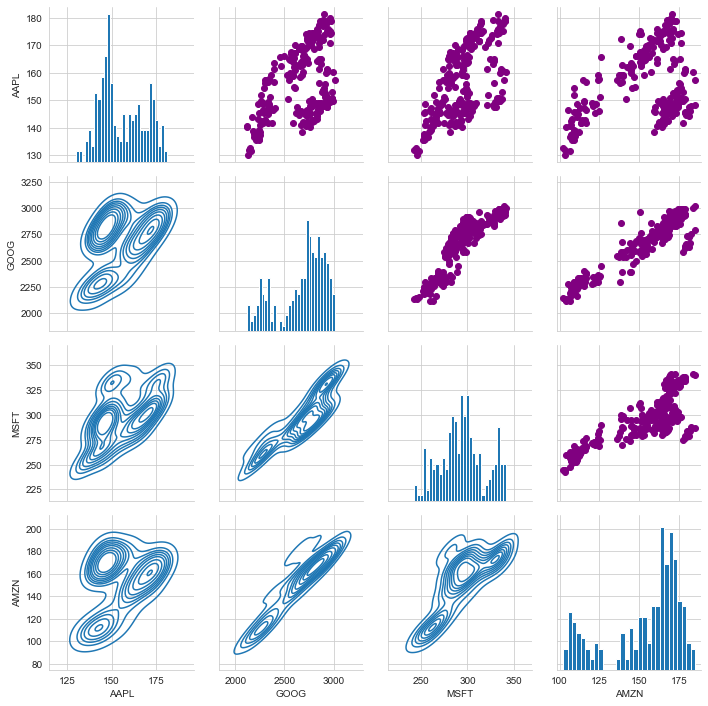

In [87]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,c_map='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

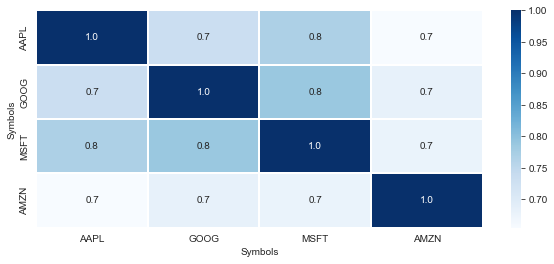

In [98]:
 
f,ax = plt.subplots(figsize=(10, 4))
sns.heatmap(tech_rets.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues")
plt.show() 

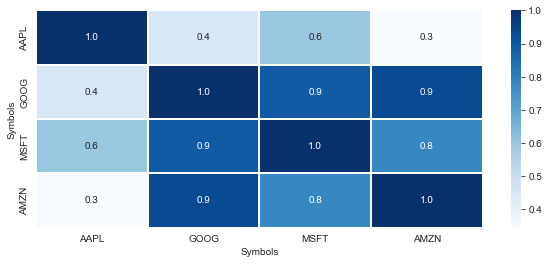

In [99]:
f,ax = plt.subplots(figsize=(10, 4))
sns.heatmap(closing_df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues")
plt.show() 

In [100]:
rets = tech_rets.dropna()

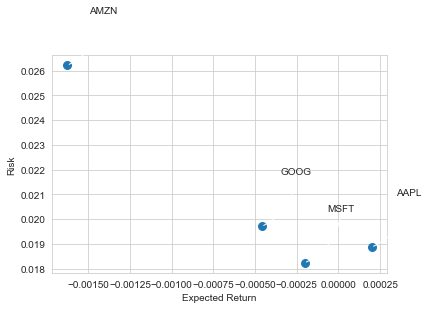

In [108]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha= 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
    )

In [112]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-15,NaN,NaN,NaN,NaN
2021-07-16,-0.014076,0.004411,-0.000996,-0.015854
2021-07-19,-0.026914,-0.019656,-0.013321,-0.006727
2021-07-20,0.025974,0.014294,0.008339,0.006649
2021-07-21,-0.005132,0.011434,0.007447,0.003361
...,...,...,...,...
2022-07-08,0.004715,0.007229,-0.002757,-0.006791
2022-07-11,-0.014758,-0.030341,-0.011769,-0.032803
2022-07-12,0.006834,-0.014358,-0.040981,-0.022640


In [121]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-16,-0.014076,0.004411,-0.000996,-0.015854
2021-07-19,-0.026914,-0.019656,-0.013321,-0.006727
2021-07-20,0.025974,0.014294,0.008339,0.006649
2021-07-21,-0.005132,0.011434,0.007447,0.003361
2021-07-22,0.009629,0.005490,0.016844,0.014736


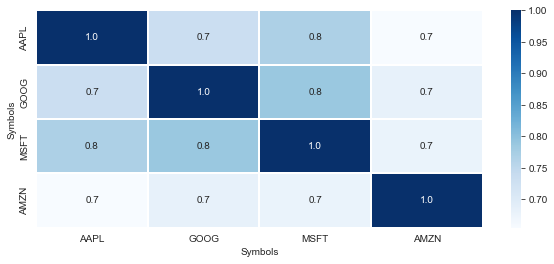

In [120]:
f,ax = plt.subplots(figsize=(10, 4))
sns.heatmap(rets.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues")
plt.show() 

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

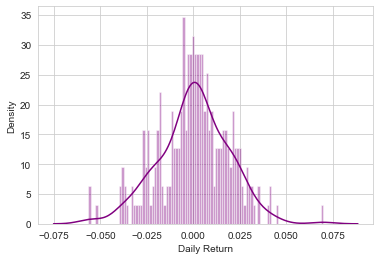

In [123]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [124]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-16,-0.014076,0.004411,-0.000996,-0.015854
2021-07-19,-0.026914,-0.019656,-0.013321,-0.006727
2021-07-20,0.025974,0.014294,0.008339,0.006649
2021-07-21,-0.005132,0.011434,0.007447,0.003361
2021-07-22,0.009629,0.005490,0.016844,0.014736


In [125]:
rets['AAPL'].quantile(0.05)

-0.03239016047726068

In [133]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [134]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-15,2651.899902,2611.959961,2650.000000,2625.330078,829300,2625.330078
2021-07-16,2643.659912,2616.429932,2632.820068,2636.909912,742800,2636.909912
2021-07-19,2624.939941,2570.739990,2623.110107,2585.080078,1285500,2585.080078
2021-07-20,2640.027100,2583.768066,2600.080078,2622.030029,954200,2622.030029
2021-07-21,2652.344971,2612.030029,2615.739990,2652.010010,737100,2652.010010


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

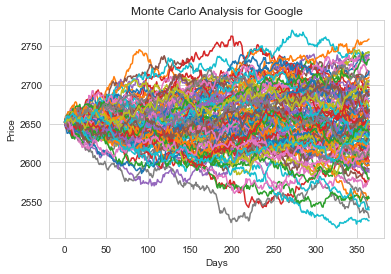

In [136]:
start_price = 2651.89
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [142]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

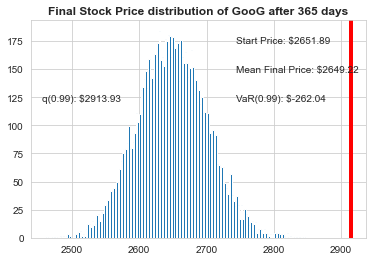

In [152]:
q = np.quantile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s = "Start Price: $%.2f" %start_price)
plt.figtext(0.6,0.7, "Mean Final Price: $%.2f" %simulations.mean())
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" %(start_price-q,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title(u"Final Stock Price distribution of GooG after %s days" % days,weight='bold');